# **DATA 311 UBCO, Boosting implemented in Python**

## **Assignment 3, CART:**

### **Boosting Implementation:**

In [1]:
##decleration & data first as always

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import statsmodels.api as sm
# import statsmodels.formula.api as smf
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import log_loss
# from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
# from sklearn.ensemble import BaggingRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

df = pd.read_csv('datasalaries.csv')
df.head(10)

,company,totalyearlycompensation,yearsofexperience,yearsatcompany,gender,Race,Education
0,Google,400000,5,5,Male,Asian,PhD
1,Microsoft,136000,3,2,Male,Two Or More,Bachelor's Degree
2,Google,337000,6,6,Male,Asian,Bachelor's Degree
3,Microsoft,222000,4,4,Male,Asian,Master's Degree
4,Amazon,310000,15,3,Male,Asian,Bachelor's Degree
5,Amazon,620000,19,7,Male,Asian,Bachelor's Degree
6,Apple,180000,1,1,Male,Asian,Bachelor's Degree
7,Amazon,210000,4,1,Male,Hispanic,Highschool
8,Amazon,142000,0,0,Male,Asian,Master's Degree
9,Facebook,242000,2,2,Male,White,Master's Degree


In [ ]:
df.describe()

### **Training Testing split, 75% 25% one final time:**

In [2]:
n = df.shape[0]
i = np.random.permutation(n)

train_size = round(0.75*n)
test_size = n - train_size

train = i[:train_size]
test = i[:test_size]

training_data = df.iloc[train]
testing_data = df.iloc[test]

training_data.columns

Index(['company', 'totalyearlycompensation', 'yearsofexperience',
       'yearsatcompany', 'gender', 'Race', 'Education'],
      dtype='object')

### **Now, Boosting Implementation:**

    we do this with boostModel = GradientBoostingRegressor(max_depth= A , n_estimators= B, random_state= C , loss= loss).fit(x_train, y_train)
    Just like before: A is the amount we prune the tree by, B is the number of Trees, & C is the seed
    but this time we also have loss: the parameter we seek to minimize; which is either 'huber', 'quantile', 'squared_error', or 'absolute_error'

In [3]:
x_train = pd.get_dummies(training_data.drop('totalyearlycompensation', axis=1)); y_train = training_data['totalyearlycompensation']

boostModel_MSE = GradientBoostingRegressor(max_depth=4, loss='squared_error' , n_estimators=500, random_state=42).fit(x_train, y_train)
boostModel_AE  = GradientBoostingRegressor(max_depth=4, loss='absolute_error', n_estimators=500, random_state=42).fit(x_train, y_train)
boostModel_H   = GradientBoostingRegressor(max_depth=4, loss='huber'         , n_estimators=500, random_state=42).fit(x_train, y_train)
boostModel_QN  = GradientBoostingRegressor(max_depth=4, loss='quantile'      , n_estimators=500, random_state=42).fit(x_train, y_train)

# 'huber', 'quantile', 'squared_error', 'absolute_error'

    to predict we deploy model.predict(x) one last time

In [4]:
x_test = pd.get_dummies(testing_data.drop('totalyearlycompensation', axis=1)); y_test = testing_data['totalyearlycompensation']

MSE_predictions       = boostModel_MSE      .predict(x_test)
AE_predictions        = boostModel_AE       .predict(x_test)
H_predictions         = boostModel_H        .predict(x_test)
QN_predictions        = boostModel_QN       .predict(x_test)


### **& on to our plot:**

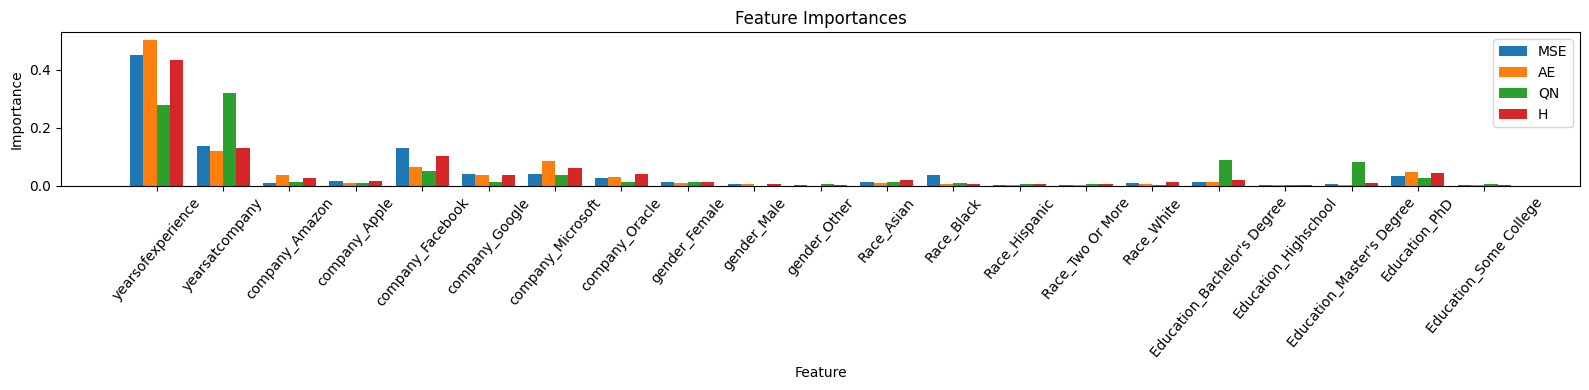

In [23]:
# feature_importances = boostModel_MSE.feature_importances_
# feature_names = x_train.columns
# plt.figure(figsize=(10, 6));    plt.bar(feature_names, feature_importances)
# plt.xlabel('Feature');      plt.ylabel('Importance');   plt.title('Feature Importances')
# plt.xticks(rotation=90);        plt.show()

# metrics = ['MSE', 'AE', 'QN', 'H'];                 values = [boostModel_MSE, boostModel_AE, boostModel_QN, boostModel_H]
# fig, axes = plt.subplots(2, 2, figsize=(12, 8));   feature_importances = []; feature_names = x_train.columns
# for i in range(4):
#     row = i // 2; col = i % 2
#     feature_importances.append(values[i].feature_importances_)
#     axes[row, col].bar(feature_names, feature_importances[i]); axes[row, col].set_xlabel('Feature'); axes[row, col].set_ylabel('Importance')
#     axes[row, col].set_title('Feature Importances - ' + metrics[i]); axes[row, col].tick_params(axis='x', rotation=90)
# plt.tight_layout(); plt.show()

metrics = ['MSE', 'AE', 'QN', 'H']; values = [boostModel_MSE, boostModel_AE, boostModel_QN, boostModel_H]
feature_importances = []; feature_names = x_train.columns
fig, ax = plt.subplots(figsize=(16, 4)); bar_width = 0.2; index = np.arange(len(feature_names))

for i in range(4):
    feature_importances.append(values[i].feature_importances_)
    ax.bar(index + i * bar_width, feature_importances[i], bar_width, label=metrics[i])

ax.set_xlabel('Feature'); ax.set_ylabel('Importance'); ax.set_title('Feature Importances')
ax.set_xticks(index + 1.5 * bar_width); ax.set_xticklabels(feature_names, rotation=50)
ax.legend(); plt.tight_layout(); plt.show()

this time instead of the tree we compare how optimizing each parameter affects the performance for added inference 

### **MSE time again:**

In [24]:
outDF = pd.DataFrame(testing_data)

outDF['MSE predictions'] = MSE_predictions; outDF['AE predictions'] = AE_predictions; outDF['QN predictions'] = QN_predictions; outDF['H predictions'] = H_predictions
outDF['Actual salary'] = outDF['totalyearlycompensation']

outDF['MSE predictions'] = outDF['MSE predictions'].astype(int); outDF['AE predictions'] = outDF['AE predictions'].astype(int)
outDF['QN predictions'] = outDF['QN predictions'].astype(int); outDF['H predictions'] = outDF['H predictions'].astype(int)

outDF = outDF[['MSE predictions', 'AE predictions', 'QN predictions', 'H predictions', 'Actual salary'] + ['company', 'yearsofexperience', 'yearsatcompany', 'gender', 'Race', 'Education']]

outDF.head(15)

,MSE predictions,AE predictions,QN predictions,H predictions,Actual salary,company,yearsofexperience,yearsatcompany,gender,Race,Education
7284,271828,278136,448348,203281,146000,Amazon,15,4,Male,Two Or More,Bachelor's Degree
2123,161529,155504,185423,160235,166000,Amazon,0,0,Female,Asian,Master's Degree
6635,317342,283283,447576,315634,383000,Amazon,13,5,Male,White,Master's Degree
5595,172813,169399,218801,171834,177000,Microsoft,3,3,Female,Asian,Master's Degree
6877,162860,167865,256552,178099,300000,Oracle,4,0,Male,White,Bachelor's Degree
1643,347097,333670,479968,352094,383000,Facebook,9,2,Male,Two Or More,Bachelor's Degree
5513,335540,335990,476763,312387,160000,Facebook,8,3,Male,White,Master's Degree
4083,126742,151611,194460,123111,142000,Microsoft,3,2,Male,Asian,Bachelor's Degree
4253,156766,162388,229176,156323,118000,Amazon,2,0,Female,Asian,Bachelor's Degree
3208,159100,157513,184135,157868,170000,Amazon,0,0,Male,Asian,Master's Degree


& now our MSE's:

In [25]:
y_test = testing_data['totalyearlycompensation']

print("MSE optimized tree:")
mme  =  (y_test - MSE_predictions).mean()
mmse = ((y_test - MSE_predictions) ** 2).mean()
print("Average Error: ", mme, "\t Mean Squared Error: ", mmse)

print("AE optimized tree:")
ame  =  (y_test - AE_predictions).mean()
amse = ((y_test - AE_predictions) ** 2).mean()
print("Average Error: ", ame, "\t Mean Squared Error: ", amse)

print("QN optimized tree:")
qme  =  (y_test - QN_predictions).mean()
qmse = ((y_test - QN_predictions) ** 2).mean()
print("Average Error: ", qme, "\t Mean Squared Error: ", qmse)

print("H optimized tree:")
hme  =  (y_test - H_predictions).mean()
hmse = ((y_test - H_predictions) ** 2).mean()
print("Average Error: ", hme, "\t Mean Squared Error: ", hmse)

MSE optimized tree:
Average Error:  -1065.2920411415475 	 Mean Squared Error:  5840162140.089299
AE optimized tree:
Average Error:  5282.45215960572 	 Mean Squared Error:  8559068226.96755
QN optimized tree:
Average Error:  -99684.2517393487 	 Mean Squared Error:  20049175649.062378
H optimized tree:
Average Error:  3020.5712558583186 	 Mean Squared Error:  6322131157.08373


note the smaller error for the non pruned tree -- so this model has no over-fit that can be solved with prune, or only has minor amounts of over-fit that only demand mild pruning

### **Next Notebooks: PCA & Ridge/Lasso**